# Project -Mohammed AlQenae



#### **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Importing Data**

Uploading the stocks with their tickers

In [2]:
returns_22=pd.read_csv('ProjectTickers.csv')

Uploading the monthly stock returns data

In [3]:
returns_data = pd.read_csv('Project-2017-21-Returns.csv')

Uplodading the Fama-French monthly risk factor data

In [4]:
ff_factors = pd.read_csv('FF-Factors-2017-2021.csv')

Uploading the financial report data

In [5]:
financial_data=pd.read_csv('Project-2021-Financials.csv')

Uploading the Industry Identifier data

In [6]:
industry_data=pd.read_csv('Project-2021-Sector.csv')

#### **Determine Risk Exposures**

Viewing the first few rows of the monthly stock returns data

In [7]:
returns_data.head()

,PERMNO,date,TICKER,RET
0,10026,20170131,JJSF,-0.043918
1,10026,20170228,JJSF,0.048836
2,10026,20170331,JJSF,0.016293
3,10026,20170428,JJSF,-0.007229
4,10026,20170531,JJSF,-0.033289


Looking for null values in the stock returns data

In [8]:
returns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


I noticed that there is some values with the letter 'C' or 'B' for the returns, below I'm dropping these values

In [9]:
returns_data=returns_data[returns_data.RET!='C']
returns_data=returns_data[returns_data.RET!='B']

Dropping null values

In [10]:
returns_data.dropna(inplace=True)

Converting the returns column to a numeric column

In [11]:
returns_data["RET"] = pd.to_numeric(returns_data["RET"])

Looking for null values in the Famma French factor returns data

In [12]:
ff_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dateff  60 non-null     int64  
 1   mktrf   60 non-null     float64
 2   smb     60 non-null     float64
 3   hml     60 non-null     float64
 4   rf      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


Observing the first few rows of the data

In [13]:
ff_factors.head()

,dateff,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


Renaming the date columns for it to match the stock returns dataset

In [14]:
ff_factors.rename(columns={'dateff':'date'}, inplace=True)
ff_factors.head()

,date,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


Getting unique ticker names

In [15]:
ticker_names=returns_data.TICKER.unique()

Creating a dataframe

In [16]:
ff_exposures = pd.DataFrame(columns = ['TICKER','mktrf','smb','hml'])
ff_exposures

,TICKER,mktrf,smb,hml


Looping through the tickers and doing regressions

In [17]:
#For loop for different ticker names
for i in ticker_names: #Looping through every ticker
  ticker=i #Getting the ticker name
  ticker_subset = returns_data[returns_data["TICKER"] == ticker]#Subsetting the data based on the ticker
  merged_data = pd.merge(ticker_subset, ff_factors, on='date', how='inner') #Merging the subset data with the Fama-French monthly risk factor data
  #Regression for FF model
  y =merged_data["RET"] - merged_data["rf"] #Defining the X and y variables
  X = merged_data[['mktrf' , 'smb' , 'hml']] 
  # Use statsmodels
  X = sm.add_constant(X) # adding a constant
  model = sm.OLS(y, X).fit()#Running the regression
  mktrf=model.params['mktrf']#Extracting items from the regression
  smb=model.params['smb']
  hml=model.params['hml']
  row= {'TICKER':ticker, 'mktrf':mktrf, 'smb':smb, 'hml':hml} #Creating a row of the extracted data
  ff_exposures=ff_exposures.append(row,ignore_index=True) #Appending the row to the dataframe

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Printing the dataframe

In [18]:
ff_exposures

,TICKER,mktrf,smb,hml
0,JJSF,0.452887,0.356829,0.524302
1,PLXS,0.955657,0.229663,0.598402
2,ORCL,0.839476,-0.587083,0.016158
3,MSFT,0.935809,-0.330320,-0.401040
4,TROW,1.121489,0.008855,0.145466
...,...,...,...,...
1918,SIX,2.062411,1.129428,0.780178
1919,VPG,1.202745,0.953927,0.093573
1920,FN,0.697870,0.905014,0.087299
1921,CBOE,0.621143,-0.399150,0.339880


Looking for null values in the dataframe

In [19]:
ff_exposures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  1923 non-null   object 
 1   mktrf   1923 non-null   float64
 2   smb     1923 non-null   float64
 3   hml     1923 non-null   float64
dtypes: float64(3), object(1)
memory usage: 60.2+ KB


Summarizing the data

In [20]:
ff_exposures.describe()

,mktrf,smb,hml
count,1923.000000,1923.000000,1923.000000
mean,1.077846,0.633402,0.310713
std,0.800940,1.936328,0.815679
min,-6.676723,-64.645356,-16.406196
25%,0.719272,0.012809,-0.054016
50%,1.005025,0.503529,0.359244
75%,1.338617,1.023676,0.760444
max,22.008963,31.005941,5.919490


Exporting the dataframe to a csv file

In [21]:
ff_exposures.to_csv('FF-Exposures.csv', index=False)

#### **Calculate Financial Ratios**

Looking at the first few rows of the financial data

In [22]:
financial_data.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,...,csho,ebit,invt,lct,lt,ni,re,sale,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,937.0,...,35.375,65.50,591.000,336.800,565.300,35.80,723.400,1651.400,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,17336.0,...,647.728,-5514.00,1795.000,19006.000,73807.000,-1993.00,-14580.000,29882.000,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,1551.1,...,112.927,805.31,367.167,1756.869,15981.762,618.72,3209.858,3803.835,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,24239.0,...,1764.082,8966.00,5157.000,13105.000,39172.000,7071.00,23154.000,43075.000,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,8583.0,...,1207.000,3678.00,1955.000,4240.000,4922.000,3162.00,-1454.000,16434.000,A,143.90


Looking for null values

In [23]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   act       1431 non-null   float64
 10  at        1886 non-null   float64
 11  ceq       1886 non-null   float64
 12  cogs      1886 non-null   float64
 13  csho      1886 non-null   float64
 14  ebit      1886 non-null   float64
 15  invt      1852 non-null   float64
 16  lct       1431 non-null   float64
 17  lt        1881 non-null   float64
 18  ni        1886 non-null   float64
 19  re        1883 non-null   float64
 20  sale      1886 non-null   floa

Dropping the current assets and current liabilities columns

In [24]:
#These columns have a lot of null values and replacing their missing values with averages would add a lot of noise to the data
del financial_data['act']
del financial_data['lct']

Filling the null values with the mean

In [25]:
financial_data['lt'].fillna(value=financial_data['lt'].mean(), inplace=True)
financial_data['re'].fillna(value=financial_data['re'].mean(), inplace=True)
financial_data['invt'].fillna(value=financial_data['invt'].mean(), inplace=True)

Calculating Financial ratios

In [26]:
financial_data['Total Asset Turnover']=(financial_data['sale']/financial_data['at'])
financial_data['ROA'] = financial_data['ni']/financial_data['at']
financial_data['NET PROFIT MARGIN'] = financial_data['ni'] / financial_data['sale']
financial_data['Market Value']=(financial_data['prcc_c']*financial_data['csho'])
financial_data['Debt ratio']=(financial_data['lt']/financial_data['at'])
financial_data['P/Sales']=(financial_data['Market Value']/financial_data['sale'])
financial_data['Price/Book']=(financial_data['Market Value']/financial_data['ceq'])
financial_data['P/E']=(financial_data['Market Value']/financial_data['ni'])
financial_data['P/EBIT']=(financial_data['Market Value']/financial_data['ebit'])
financial_data['Retention Ratio']=(financial_data['re']/financial_data['ni'])
financial_data['Gross Profit Margin']=(financial_data['sale']-financial_data['cogs'])/financial_data['sale']
financial_data['Inventory Turnover']=financial_data['cogs']/financial_data['invt']

Inverting the market-based ratios: This will make them better behaved, and it help in reducing outliers

In [27]:
financial_data['Sale/P']=1/(financial_data['P/Sales'])
financial_data['Book/Price']=1/(financial_data['Price/Book'])
financial_data['E/P']=1/(financial_data['P/E'])
financial_data['EBIT/P']=1/(financial_data['P/EBIT'])

Deleting the original market-based ratios

In [28]:
del financial_data['P/Sales']
del financial_data['Price/Book']
del financial_data['P/E']
del financial_data['P/EBIT']

Plotting boxplots to observe the skewness for different ratios

In [29]:
ratio_columns=['Total Asset Turnover', 'ROA',
       'NET PROFIT MARGIN', 'Debt ratio', 'Retention Ratio',
       'Gross Profit Margin', 'Sale/P', 'Book/Price',
       'E/P', 'EBIT/P']

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


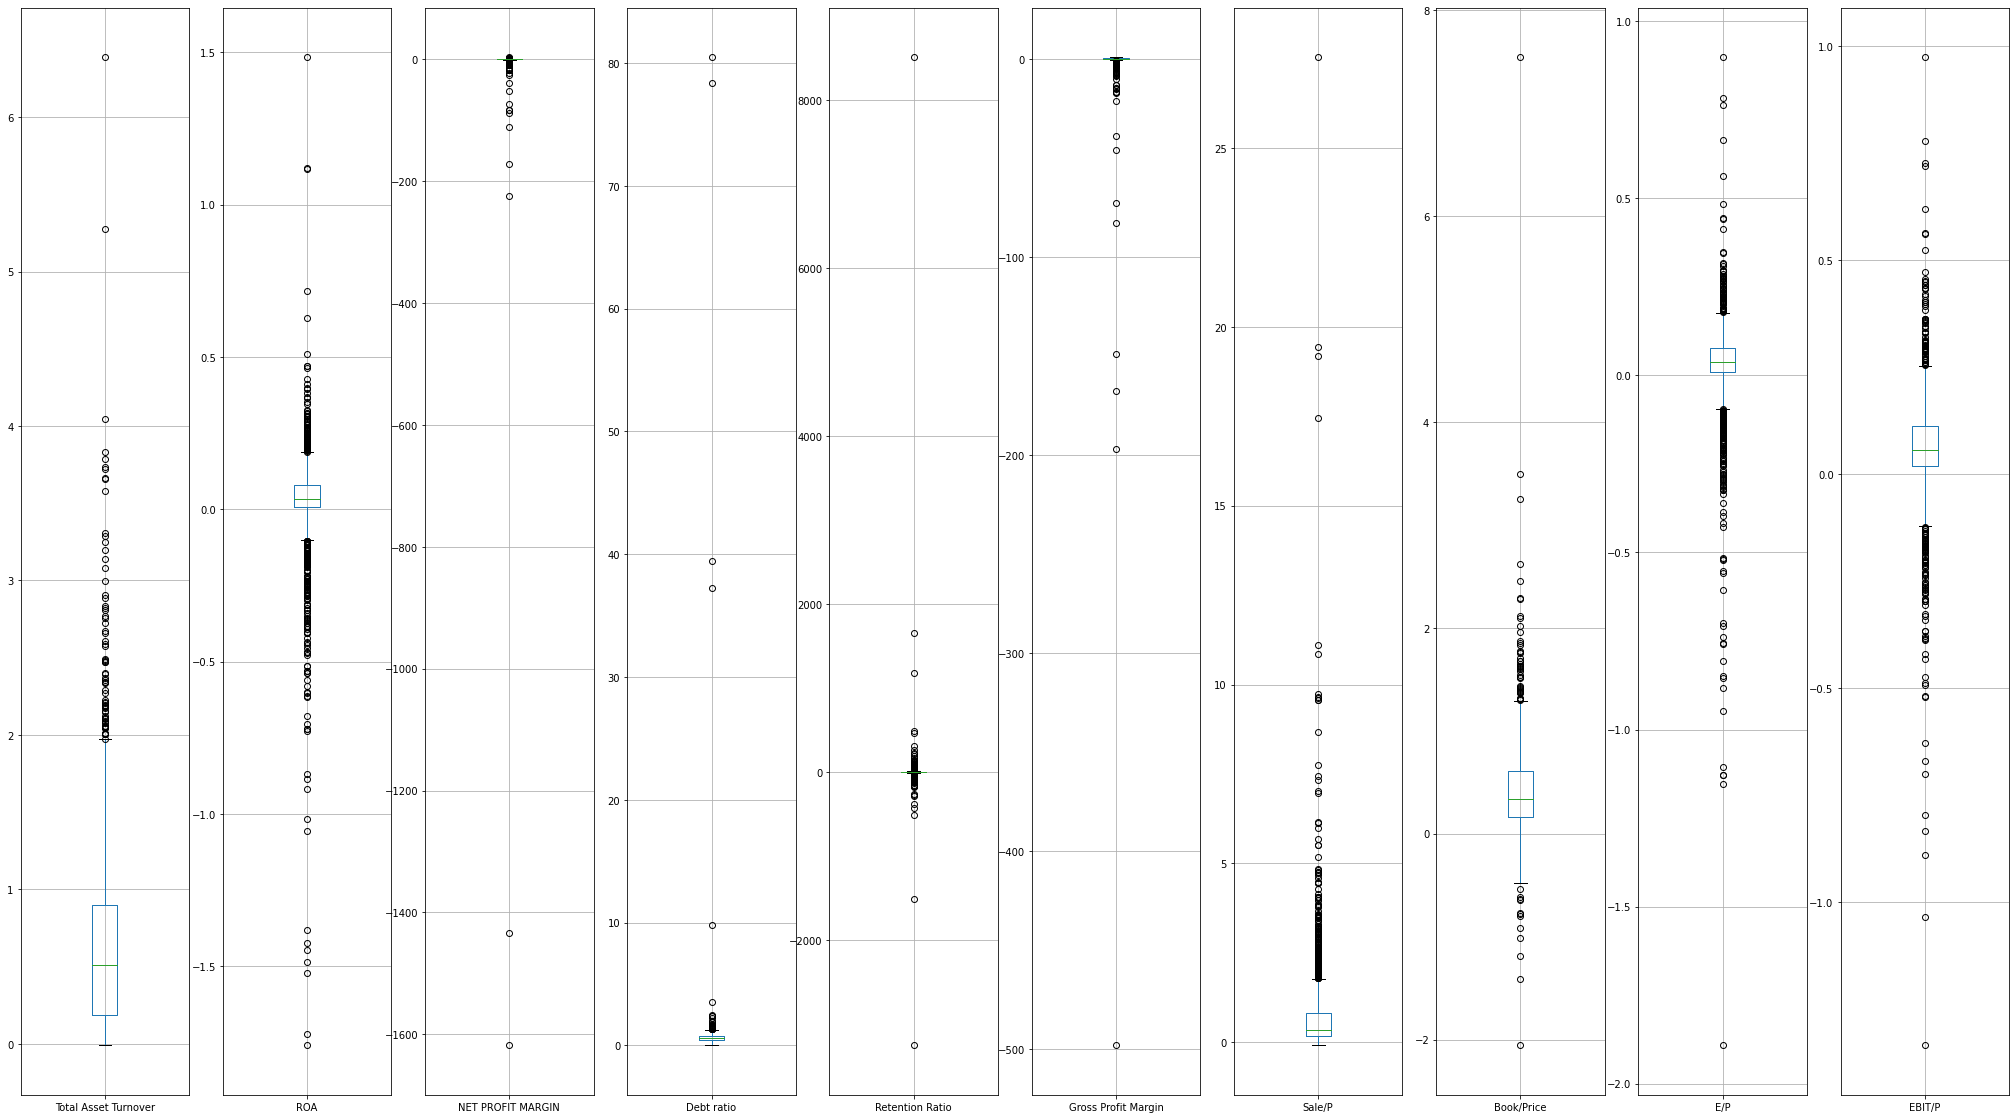

In [30]:
plt.figure(figsize=(90,20))
for i in range(0,len(ratio_columns)):
  plt.subplot(1,25,i+1)
  financial_data.boxplot(column=ratio_columns[i]);

Winsorizing the ratios: I decided to have the maximum and minimum values both at 8%. That is because I noticed by observing the boxplots that having the limits less than that wouldn't deal with most of the outliers.

In [31]:
for i in range(0,len(ratio_columns)):
  winsorize(financial_data[ratio_columns[i]], limits=[0.08, 0.08],inplace=True)

Plotting boxplots to see the difference after winsorizing: Most outliers seem to have been dealt with, there are a few columns that still have outliers. I'm not going to shrink the limits of these ratios even further since the outliers might be capturing important information, especially for firms that are too large or tooo small . Doing so might cause us to lose that information.

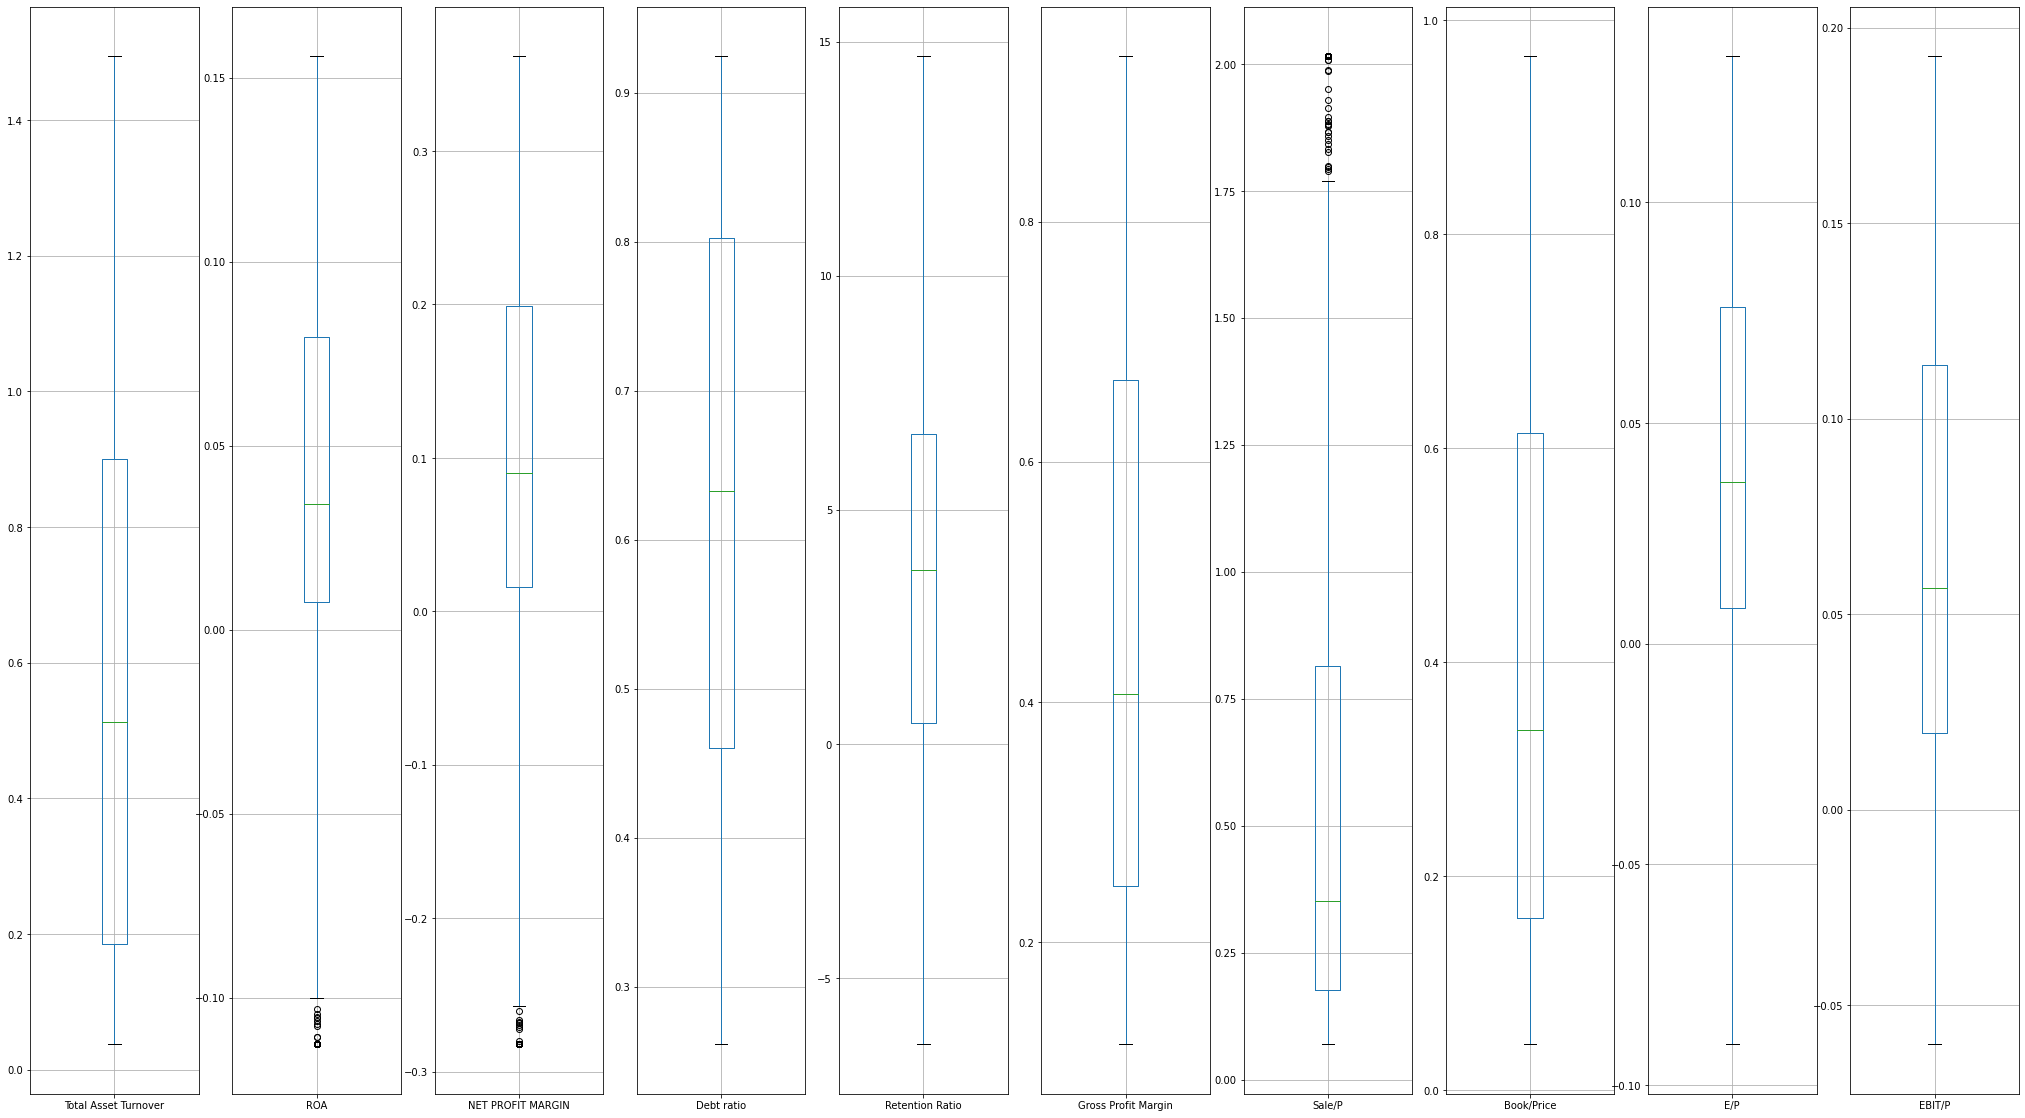

In [32]:
plt.figure(figsize=(90,20))
for i in range(0,len(ratio_columns)):
  plt.subplot(1,25,i+1)
  financial_data.boxplot(column=ratio_columns[i]);

Subsetting the data to contain only the tickers and their ratios

In [33]:
financial_data = pd.DataFrame(financial_data, columns =['tic']+ratio_columns)

Exporting the data to a csv

In [34]:
financial_data.to_csv('Fin-Ratios.csv', index=False)

#### **Industry Indicators**

In [35]:
industry_data.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,2010
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,2030
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,5510
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,3510
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,4530


In [36]:
industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gvkey     1886 non-null   int64 
 1   datadate  1886 non-null   int64 
 2   fyear     1886 non-null   int64 
 3   indfmt    1886 non-null   object
 4   consol    1886 non-null   object
 5   popsrc    1886 non-null   object
 6   datafmt   1886 non-null   object
 7   tic       1886 non-null   object
 8   curcd     1886 non-null   object
 9   costat    1886 non-null   object
 10  ggroup    1886 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 162.2+ KB


Comverting the ggroup column into dummy variables

In [37]:
industry_data= pd.get_dummies(industry_data, columns=['ggroup'])

Subsetting the data to contain only the tickers and their industry indicator

In [38]:
industry_data= industry_data.drop(columns=['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt'
      , 'curcd', 'costat'])

Exporting the data to a csv

In [39]:
industry_data.to_csv('Industry.csv', index=False)

### **Regressions**

Looking at the first few rows of the returns dataset

In [40]:
returns_22.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


Looking for null values in the dataset

In [41]:
returns_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


#### Risk Regressions

Looking at the first few rows

In [42]:
ff_exposures.head()

,TICKER,mktrf,smb,hml
0,JJSF,0.452887,0.356829,0.524302
1,PLXS,0.955657,0.229663,0.598402
2,ORCL,0.839476,-0.587083,0.016158
3,MSFT,0.935809,-0.330320,-0.401040
4,TROW,1.121489,0.008855,0.145466


Renaming the ticker column to match the stock returns dataset

In [43]:
ff_exposures.rename(columns={'TICKER':'Ticker'}, inplace=True)

Merging the two datasets

In [44]:
ff_exposures=pd.merge(ff_exposures, returns_22, on='Ticker')

Looking for null values, there aren't any which means that the dataset matches perfectly

In [45]:
ff_exposures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   mktrf   1886 non-null   float64
 2   smb     1886 non-null   float64
 3   hml     1886 non-null   float64
 4   Name    1886 non-null   object 
 5   RetYTD  1886 non-null   float64
dtypes: float64(4), object(2)
memory usage: 103.1+ KB


Running the regression

In [46]:
y =ff_exposures["RetYTD"] #Defining the X and y variables
X = ff_exposures[['mktrf', 'smb', 'hml']] 
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()#Running the regression
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     65.53
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.66e-40
Time:                        02:32:07   Log-Likelihood:                 79.981
No. Observations:                1886   AIC:                            -152.0
Df Residuals:                    1882   BIC:                            -129.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0981      0.011     -8.780      0.000      -0.120      -0.076
mktrf          0.0082      0.009      0.952      0.341      -0.009       0.025
smb           -0.0120      0.004     -2.739      0.006      -0.021      -0.003
hml            0.1068      0.008     13.818      0.000       0.092       0.122
==============================================================================
Omnibus:                      642.277   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3600.892
Skew:                           1.493   Prob(JB):                         0.00
Kurtosis:                       9.076   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-squared of the regression is 0.095 while the adj-rsquared is 0.093, this means that the Fama-French risk factors for the years 2017-2021 are able to explain about 1% of the variation in the stock returns data for early 2022 .

The beta coefficient (mktrf) is 0.0082, its p-values is greater than 0.05 and its confidence interval includes zero. Therefore we conclude that the beta is not statistically significant. We can't conclude that it is significantly different than zero. Even with the beta very close to zero, I was expecting it to be a negative number instead of a positive one. That is because companies with higher betas should be more volatile to the movement to the market, and the higher betas for prior years 2017-2021 should be correlated with lower returns for early 2022, since the stock market in general performed poorly which in turn should give a  negative coefficient.

The size factor (smb) is -0.012, since the coefficient is negative it signals that the small companies performed poorly in early 2022 compared to the large companies. The p-value of the coefficient is less than 0.05 and the confidence interval doesn't include zero. Therefore we can confidently say that the size risk was statistically significant and that the large companies outperformed the smaller ones.

The value (hml) factor is 0.107, having a positive coefficient means that the high value stocks (ones with high book to market ratio) performed better than low value(growth) stocks in the early months of 2022. The p-value is less than 0.05 and the confidence interval doens't include zero, therefore we can confidently say that the value factor is statistically significant and that high value stocks outperformed low value stocks in early 2022.


#### Financial Characteristics

In [47]:
financial_data.head()

,tic,Total Asset Turnover,ROA,NET PROFIT MARGIN,Debt ratio,Retention Ratio,Gross Profit Margin,Sale/P,Book/Price,E/P,EBIT/P
0,AIR,1.072547,0.023251,0.021679,0.367149,14.693832,0.173671,1.288865,0.760488,0.027941,0.051121
1,AAL,0.449576,-0.029985,-0.066696,0.924753,7.315605,0.115012,2.015658,0.042666,-0.090778,-0.060020
2,PNW,0.172876,0.028120,0.162657,0.726337,5.187901,0.382820,0.477178,0.740913,0.077616,0.101023
3,ABT,0.572836,0.094034,0.164156,0.520932,3.274501,0.613999,0.173496,0.144202,0.028480,0.036113
4,AMD,1.323295,0.155846,0.192406,0.396328,-0.459836,0.500487,0.094618,0.043164,0.018205,0.021176


Renaming the ticker column to match the stock returns dataset

In [48]:
financial_data.rename(columns={'tic':'Ticker'}, inplace=True)

Merging the two datasets

In [49]:
financial_data=pd.merge(financial_data, returns_22, on='Ticker')

Looking for null values, there aren't any which means that the dataset matches perfectly

In [50]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                1886 non-null   object 
 1   Total Asset Turnover  1886 non-null   float64
 2   ROA                   1886 non-null   float64
 3   NET PROFIT MARGIN     1886 non-null   float64
 4   Debt ratio            1886 non-null   float64
 5   Retention Ratio       1886 non-null   float64
 6   Gross Profit Margin   1886 non-null   float64
 7   Sale/P                1886 non-null   float64
 8   Book/Price            1886 non-null   float64
 9   E/P                   1886 non-null   float64
 10  EBIT/P                1886 non-null   float64
 11  Name                  1886 non-null   object 
 12  RetYTD                1886 non-null   float64
dtypes: float64(11), object(2)
memory usage: 206.3+ KB


Running the regression

In [51]:
y1 =financial_data["RetYTD"] #Defining the X and y variables
X1 = financial_data.drop(columns=['Ticker','Name ','RetYTD'])
X1 = sm.add_constant(X1) # adding a constant
model1 = sm.OLS(y1, X1).fit()#Running the regression
model1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     17.60
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           5.43e-31
Time:                        02:32:07   Log-Likelihood:                 70.897
No. Observations:                1886   AIC:                            -119.8
Df Residuals:                    1875   BIC:                            -58.83
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1421      0.030     -4.713      0.000      -0.201      -0.083
Total Asset Turnover    -0.1070      0.024     -4.525      0.000      -0.153      -0.061
ROA                      0.8298      0.182      4.552      0.000       0.472       1.187
NET PROFIT MARGIN       -0.1033      0.070     -1.469      0.142      -0.241       0.035
Debt ratio               0.0559      0.033      1.718      0.086      -0.008       0.120
Retention Ratio         -0.0005      0.001     -0.515      0.606      -0.002       0.001
Gross Profit Margin     -0.0370      0.028     -1.338      0.181      -0.091       0.017
Sale/P                   0.0811      0.019      4.367      0.000       0.045       0.118
Book/Price               0.1659      0.029      5.822      0.000       0.110       0.222
E/P                     -0.7293      0.212     -3.432      0.001      -1.146      -0.313
EBIT/P                   0.2315      0.155      1.495      0.135      -0.072       0.535
==============================================================================
Omnibus:                      630.586   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3798.114
Skew:                           1.437   Prob(JB):                         0.00
Kurtosis:                       9.330   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and the Adjusted R-squared for the financial ratios are at 0.086 and 0.081 respectively. This means that the financial ratios for the 2021 fiscal year are able to only explain less than 1% of the variation in stock returns in early 2022.

The Total Asset Turnover ratio has a coefficient of  -0.1070, its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant. We can confidently say that firms with higher Asset Turnover ratio in 2021, had lower stock returns in 2022. It is unclear why this is the case one would expect,as a high asset turnover ratio usually indicates better performance.

The ROA has a coefficient of  0.8298,its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant. This means that firms with a higher ROA for the 2021 year had a higher stock return in early 2022. This makes sense because higher ROA ratios signals better performance since it means that companies are able to use their assets more efficiently.

The net profit margin ratio has a coefficient of  -0.1033, its p-value is greater than 0.05 and its confidence interval includes zero which means that it is not statistically significant. 

The Debt ratio has a coefficient of  0.0559, its p-value is greater than 0.05 and its confidence interval includes zero which means that it is not statistically significant. 

The retention ratio has a coefficient of  -0.0005, its p-value is greater than 0.05 and its confidence interval includes zero which means that it is not statistically significant. 

The Gross Profit Margin ratio has a coefficient of  -0.0370,its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant. We would expect the gross profit margin to have a postive coefficient as companies with higher gross profit margins signals companies having better performance.

The Sales/price ratio has a coefficient of  0.0811,its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant.

The Book/price ratio has a coefficient of 0.1659,its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant.

The Earnings/price ratio has a coefficient of -0.7293,its p-value is greater than 0.05 and its confidence interval includes zero which means that it is not statistically significant. 

The EBIT/price ratio has a coefficient of 0.2315,its p-value is less than 0.05 and its confidence interval doesn't include zero which means that it is statistially significant.

Overall the coefficients for the market-based ratio seems to make sense, all of them are positive except for earnings/price which is not statistically significant. We would expect them to have positive coefficients since they are supposed to be positively correlated with the comapny's stock returns. 

In conclusion, the financial ratios above for the fiscal year 2021 don't seem to have good explanatory power in explaining the company's stock returns in early 2022. Besides having a low adjusted r-squared of less than 1 percent, there are a lot of coefficients that are either not statistically significant or have a sign that is counter-intuitive. Like for example, the coefficients for the gross profit margin and net profit margin ratios having a negative sign. This might be attributable to the fact that the shock in the stock markets early 2022 was unexpected and was caused by political events than fincancial ones, so a lot of  companies suffered with no regards to their previous year's financial performance and that suffering got reflected in their stock retruns.





#### Industry Dummies

Looking at the first few rows

In [52]:
industry_data.head()

,tic,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,AIR,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AAL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PNW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ABT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AMD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Renaming the ticker column to match the stock returns dataset

In [53]:
industry_data.rename(columns={'tic':'Ticker'}, inplace=True)

Merging the two datasets

In [54]:
industry_data=pd.merge(industry_data, returns_22, on='Ticker')

Looking at the first few rows

In [55]:
industry_data.head()

,Ticker,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,...,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010,Name,RetYTD
0,AIR,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AAR Corp,0.2944
1,AAL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,American Airlines Gp,0.0579
2,PNW,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Pinnacle West Capital Corp,0.0985
3,ABT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Abbott Laboratories,-0.1638
4,AMD,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Adv Micro Devices,-0.3533


##### Running the regressions

Regression to find the average stock return for each industry classification:

In [56]:
# define x as a subset of original dataframe
x = industry_data.drop(columns=[
       'Ticker','Name ','RetYTD'])
# define y as a series
y = industry_data['RetYTD']

# pass x as a dataframe, while pass y as a series
results=sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     39.07
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          6.29e-141
Time:                        02:32:07   Log-Likelihood:                 357.63
No. Observations:                1886   AIC:                            -667.3
Df Residuals:                    1862   BIC:                            -534.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1010     0.5150      0.023     22.140      0.000       0.469       0.561
ggroup_1510     0.0578      0.021      2.799      0.005       0.017       0.098
ggroup_2010    -0.0905      0.015     -6.080      0.000      -0.120      -0.061
ggroup_2020    -0.0352      0.025     -1.385      0.166      -0.085       0.015
ggroup_2030    -0.0675      0.032     -2.091      0.037      -0.131      -0.004
ggroup_2510    -0.2080      0.040     -5.162      0.000      -0.287      -0.129
ggroup_2520    -0.2086      0.025     -8.218      0.000      -0.258      -0.159
ggroup_2530    -0.0626      0.025     -2.485      0.013      -0.112      -0.013
ggroup_2550    -0.1512      0.022     -6.961      0.000      -0.194      -0.109
ggroup_3010     0.0783      0.049      1.603      0.109      -0.018       0.174
ggroup_3020     0.0388      0.030      1.277      0.202      -0.021       0.098
ggroup_3030    -0.1538      0.049     -3.147      0.002      -0.250      -0.058
ggroup_3510    -0.0664      0.018     -3.627      0.000      -0.102      -0.031
ggroup_3520    -0.1639      0.016    -10.389      0.000      -0.195      -0.133
ggroup_4010    -0.0878      0.015     -5.833      0.000      -0.117      -0.058
ggroup_4020    -0.1225      0.021     -5.833      0.000      -0.164      -0.081
ggroup_4030     0.0038      0.026      0.146      0.884      -0.047       0.054
ggroup_4510    -0.1086      0.019     -5.858      0.000      -0.145      -0.072
ggroup_4520    -0.1721      0.022     -7.734      0.000      -0.216      -0.128
ggroup_4530    -0.2528      0.027     -9.307      0.000      -0.306      -0.200
ggroup_5010     0.0118      0.056      0.212      0.832      -0.098       0.121
ggroup_5020    -0.0709      0.031     -2.280      0.023      -0.132      -0.010
ggroup_5510     0.0408      0.026      1.541      0.124      -0.011       0.093
ggroup_6010    -0.0358      0.018     -2.035      0.042      -0.070      -0.001
==============================================================================
Omnibus:                      403.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.656
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                         3.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sorting the industries in descending order based on their average returns

In [57]:
results.params.sort_values(ascending=False)

ggroup_1010    0.515035
ggroup_3010    0.078312
ggroup_1510    0.057846
ggroup_5510    0.040759
ggroup_3020    0.038780
ggroup_5010    0.011838
ggroup_4030    0.003779
ggroup_2020   -0.035157
ggroup_6010   -0.035826
ggroup_2530   -0.062583
ggroup_3510   -0.066432
ggroup_2030   -0.067454
ggroup_5020   -0.070871
ggroup_4010   -0.087832
ggroup_2010   -0.090548
ggroup_4510   -0.108644
ggroup_4020   -0.122515
ggroup_2550   -0.151223
ggroup_3030   -0.153771
ggroup_3520   -0.163937
ggroup_4520   -0.172065
ggroup_2510   -0.207992
ggroup_2520   -0.208598
ggroup_4530   -0.252813
dtype: float64

The industry with the highest average return is the Energy industry(ggroup 1010) with an average return of about 52%.The industry with the lowest average return is the SemiConductors and SemiConductor Equipment industry(ggroup 4530) with an average return of about -25%. The average returns for both industries are statistically significant since their p-values are less than 0.05 and their confidence intervals doesn't include zero.

Running a regression to compare all the industries to the Energy Industry

In [58]:
y2 =industry_data["RetYTD"] #Defining the X and y variables
X2 = industry_data.drop(columns=['Ticker','Name ','RetYTD','ggroup_1010'])
X2 = sm.add_constant(X2) #Adding a constant
model2 = sm.OLS(y2, X2).fit()#Running the regression
model2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     39.07
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          6.29e-141
Time:                        02:32:07   Log-Likelihood:                 357.63
No. Observations:                1886   AIC:                            -667.3
Df Residuals:                    1862   BIC:                            -534.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5150      0.023     22.140      0.000       0.469       0.561
ggroup_1510    -0.4572      0.031    -14.692      0.000      -0.518      -0.396
ggroup_2010    -0.6056      0.028    -21.924      0.000      -0.660      -0.551
ggroup_2020    -0.5502      0.034    -15.980      0.000      -0.618      -0.483
ggroup_2030    -0.5825      0.040    -14.646      0.000      -0.660      -0.504
ggroup_2510    -0.7230      0.047    -15.540      0.000      -0.814      -0.632
ggroup_2520    -0.7236      0.034    -21.018      0.000      -0.791      -0.656
ggroup_2530    -0.5776      0.034    -16.849      0.000      -0.645      -0.510
ggroup_2550    -0.6663      0.032    -20.932      0.000      -0.729      -0.604
ggroup_3010    -0.4367      0.054     -8.070      0.000      -0.543      -0.331
ggroup_3020    -0.4763      0.038    -12.449      0.000      -0.551      -0.401
ggroup_3030    -0.6688      0.054    -12.359      0.000      -0.775      -0.563
ggroup_3510    -0.5815      0.030    -19.639      0.000      -0.640      -0.523
ggroup_3520    -0.6790      0.028    -24.154      0.000      -0.734      -0.624
ggroup_4010    -0.6029      0.028    -21.756      0.000      -0.657      -0.549
ggroup_4020    -0.6375      0.031    -20.342      0.000      -0.699      -0.576
ggroup_4030    -0.5113      0.035    -14.719      0.000      -0.579      -0.443
ggroup_4510    -0.6237      0.030    -20.963      0.000      -0.682      -0.565
ggroup_4520    -0.6871      0.032    -21.346      0.000      -0.750      -0.624
ggroup_4530    -0.7678      0.036    -21.470      0.000      -0.838      -0.698
ggroup_5010    -0.5032      0.061     -8.314      0.000      -0.622      -0.384
ggroup_5020    -0.5859      0.039    -15.090      0.000      -0.662      -0.510
ggroup_5510    -0.4743      0.035    -13.464      0.000      -0.543      -0.405
ggroup_6010    -0.5509      0.029    -18.884      0.000      -0.608      -0.494
==============================================================================
Omnibus:                      403.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.656
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above we are doing the regression but this time dropping the group 1010, this means that the the intercept now represents the group 1010. And all the coefficients are presented in relation to the intercept. I chose the group 1010 because I wanted to compare all the industries with the Energy industry since it was the best performing one. As you would expect all of the industries have negative coefficients compared to the energy industry, since they all had lower returns compared to it. Also, the difference between their average returns is statistically significant since all of the p-values are less than 0.05, and all of the confidence intervals doesn't include zero. We can confidently say that the energy sector outperfomed all of the other sectors at that time. The adj rsquared is 0.326, which means that the industry variables are doing a decent job explaining the variance in the stock returns.

Running regressions dropping each industry one by one

In [59]:
ggroups=['ggroup_1010',
       'ggroup_1510', 'ggroup_2010', 'ggroup_2020', 'ggroup_2030',
       'ggroup_2510', 'ggroup_2520', 'ggroup_2530', 'ggroup_2550',
       'ggroup_3010', 'ggroup_3020', 'ggroup_3030', 'ggroup_3510',
       'ggroup_3520', 'ggroup_4010', 'ggroup_4020', 'ggroup_4030',
       'ggroup_4510', 'ggroup_4520', 'ggroup_4530', 'ggroup_5010',
       'ggroup_5020', 'ggroup_5510', 'ggroup_6010']

In [60]:
ggroups_rsquared=pd.DataFrame()
for i in ggroups:
  # define x as a subset of original dataframe
  x = industry_data.drop(columns=[
       'Ticker', 'Name ','RetYTD',i])
  # define y as a series
  y = industry_data['RetYTD']

  # pass x as a dataframe, while pass y as a series
  results=sm.OLS(y, x).fit()
  rsquared_adj=results.rsquared_adj
  row={'Column_dropped':i,'adj_rsquared':rsquared_adj}
  ggroups_rsquared=ggroups_rsquared.append(row,ignore_index=True)

In [61]:
ggroups_rsquared.sort_values(by='adj_rsquared')

,Column_dropped,adj_rsquared
0,ggroup_1010,0.192221
13,ggroup_3520,0.323490
19,ggroup_4530,0.330812
6,ggroup_2520,0.337361
18,ggroup_4520,0.340015
8,ggroup_2550,0.343915
2,ggroup_2010,0.347861
17,ggroup_4510,0.348771
15,ggroup_4020,0.348872
14,ggroup_4010,0.348872


Plotting the results

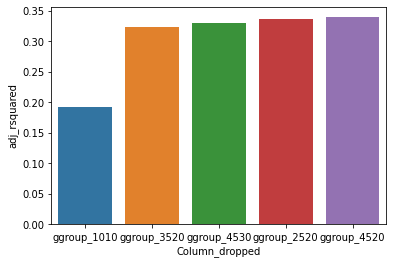

In [62]:
ggroups_rsquared=ggroups_rsquared.sort_values(by='adj_rsquared')[:5]
sns.barplot(x="Column_dropped", y="adj_rsquared", data=ggroups_rsquared)

Above, I am looping through all of the industry variables and dropping them one by one to see if the adjusted r-squared changes, for all of them except the energy sector the adjusted r-squared actually increases slightly when they are dropped. This means that most of the variance in the regression is in fact explained by the energy sector. Although most of the explanatory power comes from the energy sector it is not enough to rely on entirely, each of the other industries  slightly contriubute to the regression to give it a high rsquared.Dropping any of them wouldn't impact the regression negatively, but dropping all would. We would have a very low Adjusted R-squared if we dropped all of the industries and relied on the energy sector, even if we kept a few others we would still get a low Adjusted R-squared. We need the majority of the other industries as well to get the highest Adjusted R-squared possible. Having all the variables gives us good explanatory power, together combined they are able to explain about 33% of the variance in the stock returns.

#### Combined regression

Merging the industry variables data with the financial ratios

In [63]:
merged_data=pd.merge(industry_data, financial_data, on='Ticker',suffixes=('', '_remove')) #Adding a suffix called ‘remove’ for newly joined columns that have the same name in both data frames

Combining the data with the risk exposures

In [64]:
merged_data=pd.merge(merged_data, ff_exposures, on='Ticker',suffixes=('', '_remove')) #Adding a suffix called ‘remove’ for newly joined columns that have the same name in both data frames

In [65]:
merged_data.head()

,Ticker,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,...,Book/Price,E/P,EBIT/P,Name _remove,RetYTD_remove,mktrf,smb,hml,Name _remove,RetYTD_remove
0,AIR,0,0,1,0,0,0,0,0,0,...,0.760488,0.027941,0.051121,AAR Corp,0.2944,1.471411,0.796516,1.025327,AAR Corp,0.2944
1,AAL,0,0,0,0,1,0,0,0,0,...,0.042666,-0.090778,-0.060020,American Airlines Gp,0.0579,1.315550,0.612825,1.248123,American Airlines Gp,0.0579
2,PNW,0,0,0,0,0,0,0,0,0,...,0.740913,0.077616,0.101023,Pinnacle West Capital Corp,0.0985,0.261449,-0.536793,0.395666,Pinnacle West Capital Corp,0.0985
3,ABT,0,0,0,0,0,0,0,0,0,...,0.144202,0.028480,0.036113,Abbott Laboratories,-0.1638,0.764430,-0.304822,-0.266568,Abbott Laboratories,-0.1638
4,AMD,0,0,0,0,0,0,0,0,0,...,0.043164,0.018205,0.021176,Adv Micro Devices,-0.3533,2.052229,-0.443229,-1.372128,Adv Micro Devices,-0.3533


Removing duplicate columns

In [66]:
merged_data.drop([i for i in merged_data.columns if 'remove' in i],
               axis=1, inplace=True) #Looping through columns and deleting the ones that have 'remove' in them

Viewing the first few rows of the data

In [67]:
merged_data.head()

,Ticker,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,...,Debt ratio,Retention Ratio,Gross Profit Margin,Sale/P,Book/Price,E/P,EBIT/P,mktrf,smb,hml
0,AIR,0,0,1,0,0,0,0,0,0,...,0.367149,14.693832,0.173671,1.288865,0.760488,0.027941,0.051121,1.471411,0.796516,1.025327
1,AAL,0,0,0,0,1,0,0,0,0,...,0.924753,7.315605,0.115012,2.015658,0.042666,-0.090778,-0.060020,1.315550,0.612825,1.248123
2,PNW,0,0,0,0,0,0,0,0,0,...,0.726337,5.187901,0.382820,0.477178,0.740913,0.077616,0.101023,0.261449,-0.536793,0.395666
3,ABT,0,0,0,0,0,0,0,0,0,...,0.520932,3.274501,0.613999,0.173496,0.144202,0.028480,0.036113,0.764430,-0.304822,-0.266568
4,AMD,0,0,0,0,0,0,0,0,0,...,0.396328,-0.459836,0.500487,0.094618,0.043164,0.018205,0.021176,2.052229,-0.443229,-1.372128


Performing the combined regressions

In [68]:
y3 =merged_data["RetYTD"] #Defining the X and y variables
X3 = merged_data.drop(columns=['Ticker','Name ','RetYTD'])
X3 = sm.add_constant(X3) # adding a constant
model3 = sm.OLS(y3, X3).fit()#Running the regression
model3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     32.37
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          5.21e-168
Time:                        02:32:08   Log-Likelihood:                 447.14
No. Observations:                1886   AIC:                            -820.3
Df Residuals:                    1849   BIC:                            -615.2
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1691      0.032     -5.256      0.000      -0.232      -0.106
ggroup_1010              0.5318      0.025     21.551      0.000       0.483       0.580
ggroup_1510              0.0970      0.020      4.819      0.000       0.058       0.137
ggroup_2010             -0.0268      0.015     -1.730      0.084      -0.057       0.004
ggroup_2020              0.0179      0.024      0.735      0.462      -0.030       0.065
ggroup_2030             -0.0386      0.031     -1.255      0.210      -0.099       0.022
ggroup_2510             -0.1623      0.038     -4.238      0.000      -0.237      -0.087
ggroup_2520             -0.1558      0.025     -6.225      0.000      -0.205      -0.107
ggroup_2530              0.0074      0.025      0.297      0.766      -0.041       0.056
ggroup_2550             -0.0955      0.023     -4.096      0.000      -0.141      -0.050
ggroup_3010              0.1168      0.047      2.462      0.014       0.024       0.210
ggroup_3020              0.0893      0.029      3.073      0.002       0.032       0.146
ggroup_3030             -0.0949      0.046     -2.056      0.040      -0.185      -0.004
ggroup_3510              0.0374      0.019      2.004      0.045       0.001       0.074
ggroup_3520             -0.0170      0.019     -0.908      0.364      -0.054       0.020
ggroup_4010             -0.1762      0.027     -6.462      0.000      -0.230      -0.123
ggroup_4020             -0.1208      0.023     -5.261      0.000      -0.166      -0.076
ggroup_4030             -0.0204      0.027     -0.741      0.459      -0.074       0.034
ggroup_4510              0.0016      0.020      0.083      0.934      -0.037       0.040
ggroup_4520             -0.0924      0.022     -4.260      0.000      -0.135      -0.050
ggroup_4530             -0.1421      0.027     -5.346      0.000      -0.194      -0.090
ggroup_5010              0.0159      0.052      0.305      0.760      -0.086       0.118
ggroup_5020             -0.0061      0.029     -0.208      0.835      -0.064       0.051
ggroup_5510              0.0567      0.027      2.089      0.037       0.003       0.110
ggroup_6010              0.0078      0.020      0.385      0.700      -0.032       0.048
Total Asset Turnover    -0.0297      0.022     -1.338      0.181      -0.073       0.014
ROA                      0.1169      0.167      0.698      0.485      -0.211       0.445
NET PROFIT MARGIN        0.0202      0.068      0.298      0.766      -0.113       0.153
Debt ratio               0.0685      0.031      2.195      0.028       0.007       0.130
Retention Ratio          0.0008      0.001      0.960      0.337      -0.001       0.003
Gross Profit Margin      0.0724      0.028      2.604      0.009       0.018       0.127
Sale/P                   0.0341      0.017      2.017    

The combined regression has an R-squared and an Adjusted R-squared of 0.387 and 0.375 respectively. This means the regressions combined are doing a better job  explaining the stock returns in early 2022 than any of the regressions by its own. The coefficients were slightly affected by combining the regressions, for most their values changed slightly but they remained to have the same sign and same signifigance level. For others there were major changes, like the ROA coefficient which used to be statistically significant around  around 0.83 is now not significant since its p-value is larger than 0.05. On the other hand, the beta coefficient(mktrf) used to be not statistically significant and is now significant since its p-value is less than 0.05. It also has a negative coefficient instead of a positive one which makes more sense than before,since we are expecting firms that are more volatile to the market to have lower returns, therefore the higher the beta the lower the return. The negative coefficient captures that relationship.

Regression Dropping each variable one by one

In [69]:
coefficients=[ 'ggroup_1010', 'ggroup_1510',
       'ggroup_2010', 'ggroup_2020', 'ggroup_2030', 'ggroup_2510',
       'ggroup_2520', 'ggroup_2530', 'ggroup_2550', 'ggroup_3010',
       'ggroup_3020', 'ggroup_3030', 'ggroup_3510', 'ggroup_3520',
       'ggroup_4010', 'ggroup_4020', 'ggroup_4030', 'ggroup_4510',
       'ggroup_4520', 'ggroup_4530', 'ggroup_5010', 'ggroup_5020',
       'ggroup_5510', 'ggroup_6010', 'Total Asset Turnover', 'ROA',
       'NET PROFIT MARGIN', 'Debt ratio', 'Retention Ratio',
       'Gross Profit Margin', 'Sale/P', 'Book/Price', 'E/P', 'EBIT/P', 'mktrf',
       'smb', 'hml']

In [70]:
coefficients_rsquared=pd.DataFrame()
for i in coefficients:
  # define x as a subset of original dataframe
  x = merged_data.drop(columns=['Ticker','Name ','RetYTD',i])
  # define y as a series
  y = merged_data['RetYTD']

  # pass x as a dataframe, while pass y as a series
  results=sm.OLS(y, x).fit()
  rsquared_adj=results.rsquared_adj
  row={'Column_dropped':i,'adj_rsquared':rsquared_adj}
  coefficients_rsquared=coefficients_rsquared.append(row,ignore_index=True)

The table below orders the coefficients in the combined regression based on importance. When the value factor(hml) is droppedm the adjusted r-squared drops the most. The value factor seems to be the most important single variable in explaining the stock returns for early 2022. All of the industry variables are at the end of the table, so they seem to be the least important (on a single basis) in explaining the stock returns for early 2022.

In [71]:
coefficients_rsquared.sort_values(by='adj_rsquared')

,Column_dropped,adj_rsquared
36,hml,0.358073
35,smb,0.368112
31,Book/Price,0.369633
29,Gross Profit Margin,0.372685
34,mktrf,0.373155
27,Debt ratio,0.373348
30,Sale/P,0.373602
24,Total Asset Turnover,0.374373
28,Retention Ratio,0.374666
32,E/P,0.374810


Plotting the results

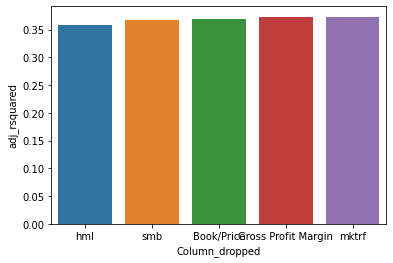

In [72]:
coefficients_rsquared=coefficients_rsquared.sort_values(by='adj_rsquared')[:5]
sns.barplot(x="Column_dropped", y="adj_rsquared", data=coefficients_rsquared)

In [73]:
coefficients_rsquared.sort_values(by='adj_rsquared')

,Column_dropped,adj_rsquared
36,hml,0.358073
35,smb,0.368112
31,Book/Price,0.369633
29,Gross Profit Margin,0.372685
34,mktrf,0.373155


Regression importance

In [74]:
#Creating a dictionary with the regression names as keys and their column names as values
regressions_dict={}
regressions_dict["Risk regressions"] = ['mktrf', 'smb', 'hml']
regressions_dict["Financial ratios"] = ratio_columns
regressions_dict["Industry dummies"]=ggroups  

Looping through the regressions and dropping them one by one

In [75]:
regressions_rsquared=pd.DataFrame()
for i in regressions_dict:
  # define x as a subset of original dataframe
  x = merged_data.drop(columns=['Ticker','Name ','RetYTD']+regressions_dict[i])
  x = sm.add_constant(x)
  # define y as a series
  y = merged_data['RetYTD']

  # pass x as a dataframe, while pass y as a series
  results=sm.OLS(y, x).fit()
  rsquared_adj=results.rsquared_adj
  row={'Regression_dropped':i,'adj_rsquared':rsquared_adj}
  regressions_rsquared=regressions_rsquared.append(row,ignore_index=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The table below shows what is the adjusted r-squared for the combined regression when we drop each of the following regressions. I am comparing these to the combined regression I have above with an adjusted r-squared of 0.375.

In [76]:
regressions_rsquared

,Regression_dropped,adj_rsquared
0,Risk regressions,0.354528
1,Financial ratios,0.358114
2,Industry dummies,0.123957


Plotting the results

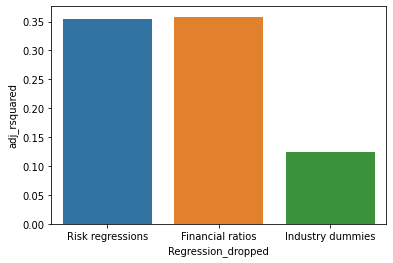

In [77]:
sns.barplot(x="Regression_dropped", y="adj_rsquared", data=regressions_rsquared)

The industry variables seem to be the most important since the adj rsquared drops the most when they are removed.
The two other groups seem to be explaining some of the variance in the returns but not so much since the adjusted r squared drops about only two percent when they are removed. What is worth noting that when we drop the industry variables one by one from the combined regression, instead of dropping them together the adjusted rsquared actually increases. This means that none of the individual industry variables has a strong explanatory power, they only have it when we combine them together.

In conclusion,combining all the regresions seems to be the best option in explaining the stock's return in early 2022. However most of the variance is explained by the industry variables, the financial ratios and risk regressions seem to be adding a small portion of the explanatory power.